In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
nltk.download("stopwords")
nltk.download("wordnet")
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train = pd.read_csv("/content/sample_data/TapasData - Copy.csv")

train.head()

,Unnamed: 0,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,0,The Two Other Species (Novel),Announcements,"Jul 19, 2021 3:11 am",0,Map Unavailable,Map Unavailable,"Hello everyone, My name is Genr not my real na...",[]
1,1,"“Lanche”, a textless comic [one-shot]",Announcements,"Jul 18, 2021 5:54 pm",0,Map Unavailable,Map Unavailable,Hey there! \nDAKÍCORP's comics have been broug...,[]
2,2,Moon Violations Unit - Episode 1 complete,Announcements,"Jul 11, 2021 8:51 am",1 Like,4,107,Huge story ahead. Comments/Subs very welcome.\...,['What a great and refreshing new comic. (in r...
3,3,"Introducing Lauren, Community Marketing Intern",Announcements,"Jun 22, 2021 5:40 pm",20,24,337,Welcome Lauren!,"['Hi Lauren, welcome~', 'Oh dang! Welcome, Lau..."
4,4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,Announcements,"May 26, 2021 11:49 am",19,10,240,Just need 4k more...,['this is cool thanks! the milestone are edita...


In [ ]:
train = train.drop(columns=["Unnamed: 0"])
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,The Two Other Species (Novel),Announcements,"Jul 19, 2021 3:11 am",0,Map Unavailable,Map Unavailable,"Hello everyone, My name is Genr not my real na...",[]
1,"“Lanche”, a textless comic [one-shot]",Announcements,"Jul 18, 2021 5:54 pm",0,Map Unavailable,Map Unavailable,Hey there! \nDAKÍCORP's comics have been broug...,[]
2,Moon Violations Unit - Episode 1 complete,Announcements,"Jul 11, 2021 8:51 am",1 Like,4,107,Huge story ahead. Comments/Subs very welcome.\...,['What a great and refreshing new comic. (in r...
3,"Introducing Lauren, Community Marketing Intern",Announcements,"Jun 22, 2021 5:40 pm",20,24,337,Welcome Lauren!,"['Hi Lauren, welcome~', 'Oh dang! Welcome, Lau..."
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,Announcements,"May 26, 2021 11:49 am",19,10,240,Just need 4k more...,['this is cool thanks! the milestone are edita...


In [ ]:
train = train.drop(train[train["Original Post"] == "Aberrant HTML"].index)
train = train.drop(train[train["Comments"] == "[]"].index)
train = train.drop(train[train["Category"] == "Announcements"].index)
train = train.drop(train[train["Category"] == "Answered"].index)

train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
119,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1.7k,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
120,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! \nThe March Comic Madness Contest has ...,"[""Congrats to everyone and thank you so very m..."
121,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7.6k,As simple as it sounds! Start with your very f...,['Let me start this off:\nAcroalis-1\n\nacroal...
123,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
124,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay https://tapas.io/episode/220082625\nwhene...,"['Your art is adorable, congratulations on win..."


In [ ]:
train = train.reset_index(drop=True)
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1.7k,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! \nThe March Comic Madness Contest has ...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7.6k,As simple as it sounds! Start with your very f...,['Let me start this off:\nAcroalis-1\n\nacroal...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay https://tapas.io/episode/220082625\nwhene...,"['Your art is adorable, congratulations on win..."


In [ ]:
train["Num Views"] = train["Num Views"].apply(lambda x: str(int(float(x.replace("k",""))*1000)) if "k" in x else x)
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! \nThe March Comic Madness Contest has ...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off:\nAcroalis-1\n\nacroal...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay https://tapas.io/episode/220082625\nwhene...,"['Your art is adorable, congratulations on win..."


In [ ]:
data["Num Replies"] = data["Num Replies"].apply(lambda x: str(int(float(x.replace("k",""))*1000)) if "k" in x else x)
data.head()

In [ ]:
train["Likes"] = train["Likes"].apply(lambda x: x.replace(" Like", ""))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! \nThe March Comic Madness Contest has ...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off:\nAcroalis-1\n\nacroal...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay https://tapas.io/episode/220082625\nwhene...,"['Your art is adorable, congratulations on win..."


In [ ]:
grouping = train.groupby("Category")
print(grouping.size())

Category
Art | Comics                    1006
Collaborations                   839
Events | Challenges              619
Off Topic                       1005
Promotions                       977
Questions                       1027
Reviews | Feedback               677
Tech Support | Site Feedback     953
Writing | Novels                 999
dtype: int64


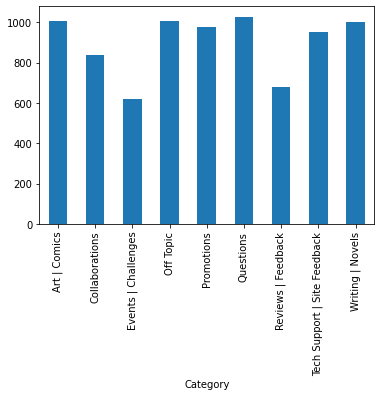

In [ ]:
train.groupby(["Category"]).size().plot.bar()

In [ ]:
train["Original Post"][2]

'As simple as it sounds! Start with your very first page, and everyday upload the next strip on your story. ((VISUAL COMICS ONLY)). There will be a few rules to help grow comics posted here, \n   -Don\'t press the reply button to this original post but rather on the pages itself.    -You can not update your pages on the same post. (Think how much people would have to scroll down to find something to comment on xD).   -You must read the page of a least 3 people per day and comment on it. Comments can be as short or as long as youwish.   -You are allowed to stick with the same 3 comics or keep changing it. Just go for the ones you like basically. Commenting on more than 3 is allowed, as long as you like the page.   -Only consider subbing to your 3 choices if you really really like the series you commented on   -The rules apply to myself (Thought I\'m liked to comment on more since I made thread)   -Just because I made the thread dosen\'t mean you have to comment on my pages.\nThe format 

In [ ]:
train["Title"] = train["Title"].apply(lambda x: str(x).replace("\n", " "))
train["Original Post"] = train["Original Post"].apply(lambda x: str(x).replace("\n", " "))
train["Comments"] = train["Comments"].apply(lambda x: str(x).replace("\n", " "))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! The March Comic Madness Contest has c...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off:\nAcroalis-1\n\nacroal...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay https://tapas.io/episode/220082625 whenev...,"['Your art is adorable, congratulations on win..."


In [ ]:
train["Comments"][2]

'[\'Let me start this off:\\nAcroalis-1\\n\\nacroalis-page-1.jpg940x1253 585 KB\\n\\n\\n\\ntapas.io\\n\\n\\n\\nAcroalis | Tapas\\nAcroalis is a fantasy world in which everyone has been living peacefully. that is, until two meteors landed.\\n  the people of Acroalis ignored them, thinking them of a normal phenomena, but little do they know the meteors\\n   contained a powerful...\\n\\n\\n\\n\\n\\nWill be waiting to check and comment your pages.\', "LOSTLAND-1\\n\\n\\ntapas.io9\\n\\n\\n\\nLOSTLAND :: Hello, Dear Listeners.... | Tapas\\nHappy 8th Anniversary, by the way! Yes, The Lostland has been running since 2011 on this exact day, so how best to celebrate than with a fresh, new start on a long running series?\\n\\nYou can find the old one here, but don\'t expect spoilers! A lot has...", \'My comment will be that I count help but sub and read your whole thing thus far. Very interesting wasland world. Well you got my attention now. Jut post it here each day and good luck getting others 

In [ ]:
train["Title"] = train["Title"].apply(lambda x: re.sub(r'http\S+', '', str(x)))
train["Original Post"] = train["Original Post"].apply(lambda x: re.sub(r'http\S+', '', str(x)))
train["Comments"] = train["Comments"].apply(lambda x: re.sub(r'http\S+', '', str(x)))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! The March Comic Madness Contest has c...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off:\nAcroalis-1\n\nacroal...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever I enter a contest I immediately...,"['Your art is adorable, congratulations on win..."


In [ ]:
train["Comments"][2]

'[\'Let me start this off:\\nAcroalis-1\\n\\nacroalis-page-1.jpg940x1253 585 KB\\n\\n\\n\\ntapas.io\\n\\n\\n\\nAcroalis | Tapas\\nAcroalis is a fantasy world in which everyone has been living peacefully. that is, until two meteors landed.\\n  the people of Acroalis ignored them, thinking them of a normal phenomena, but little do they know the meteors\\n   contained a powerful...\\n\\n\\n\\n\\n\\nWill be waiting to check and comment your pages.\', "LOSTLAND-1\\n\\n\\ntapas.io9\\n\\n\\n\\nLOSTLAND :: Hello, Dear Listeners.... | Tapas\\nHappy 8th Anniversary, by the way! Yes, The Lostland has been running since 2011 on this exact day, so how best to celebrate than with a fresh, new start on a long running series?\\n\\nYou can find the old one here, but don\'t expect spoilers! A lot has...", \'My comment will be that I count help but sub and read your whole thing thus far. Very interesting wasland world. Well you got my attention now. Jut post it here each day and good luck getting others 

In [ ]:
train["Title"] = train["Title"].apply(lambda x: str(x).replace("\\n", " "))
train["Original Post"] = train["Original Post"].apply(lambda x: str(x).replace("\\n", " "))
train["Comments"] = train["Comments"].apply(lambda x: str(x).replace("\\n", " "))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! The March Comic Madness Contest has c...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off: Acroalis-1 acroalis-...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever I enter a contest I immediately...,"['Your art is adorable, congratulations on win..."


In [ ]:
train["Comments"][2]

'[\'Let me start this off: Acroalis-1  acroalis-page-1.jpg940x1253 585 KB    tapas.io    Acroalis | Tapas Acroalis is a fantasy world in which everyone has been living peacefully. that is, until two meteors landed.   the people of Acroalis ignored them, thinking them of a normal phenomena, but little do they know the meteors    contained a powerful...      Will be waiting to check and comment your pages.\', "LOSTLAND-1   tapas.io9    LOSTLAND :: Hello, Dear Listeners.... | Tapas Happy 8th Anniversary, by the way! Yes, The Lostland has been running since 2011 on this exact day, so how best to celebrate than with a fresh, new start on a long running series?  You can find the old one here, but don\'t expect spoilers! A lot has...", \'My comment will be that I count help but sub and read your whole thing thus far. Very interesting wasland world. Well you got my attention now. Jut post it here each day and good luck getting others interested xD.\', \'ACROALIS-2  acroalis-page-2.jpg940x1253 

In [ ]:
train["Title"] = train["Title"].apply(lambda x: re.sub(r'\S+.jpg\S+', '', str(x)))
train["Original Post"] = train["Original Post"].apply(lambda x: re.sub(r'\S+.jpg\S+', '', str(x)))
train["Comments"] = train["Comments"].apply(lambda x: re.sub(r'\S+.jpg\S+', '', str(x)))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! The March Comic Madness Contest has c...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off: Acroalis-1 585 KB ...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever I enter a contest I immediately...,"['Your art is adorable, congratulations on win..."


In [ ]:
train["Comments"][2]

'[\'Let me start this off: Acroalis-1   585 KB    tapas.io    Acroalis | Tapas Acroalis is a fantasy world in which everyone has been living peacefully. that is, until two meteors landed.   the people of Acroalis ignored them, thinking them of a normal phenomena, but little do they know the meteors    contained a powerful...      Will be waiting to check and comment your pages.\', "LOSTLAND-1   tapas.io9    LOSTLAND :: Hello, Dear Listeners.... | Tapas Happy 8th Anniversary, by the way! Yes, The Lostland has been running since 2011 on this exact day, so how best to celebrate than with a fresh, new start on a long running series?  You can find the old one here, but don\'t expect spoilers! A lot has...", \'My comment will be that I count help but sub and read your whole thing thus far. Very interesting wasland world. Well you got my attention now. Jut post it here each day and good luck getting others interested xD.\', \'ACROALIS-2   873 KB   tapas.io    Acroalis :: Prologue (remake) | T

In [ ]:
train["Title"] = train["Title"].apply(lambda x: re.sub(r'\S+.png\S+', '', str(x)))
train["Original Post"] = train["Original Post"].apply(lambda x: re.sub(r'\S+.png\S+', '', str(x)))
train["Comments"] = train["Comments"].apply(lambda x: re.sub(r'\S+.png\S+', '', str(x)))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days you just don't work on your comic, e...","[""Hi, I'm Gabriella. For this July Comics Chal..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! The March Comic Madness Contest has c...,"[""Congrats to everyone and thank you so very m..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,As simple as it sounds! Start with your very f...,['Let me start this off: Acroalis-1 585 KB ...
3,Draw Panel in your Style Event with a PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I haven't done this before. But I wanted t...","[""This is so fun Count me in BTW how to enter ..."
4,I won the pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever I enter a contest I immediately...,"['Your art is adorable, congratulations on win..."


In [ ]:
train["Title"] = train["Title"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords.words("english")))
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords.words("english")))
train["Comments"] = train["Comments"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords.words("english")))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,July COMICS CHALLENGE - Get Stuff Done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"Some days work comic, even though really want ...","[""Hi, I'm Gabriella. For July Comics Challenge..."
1,March Comic Madness Contest Final Results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,Hooray! The March Comic Madness Contest come c...,"[""Congrats everyone thank much!!! We're flatte..."
2,YOUR COMIC HERE! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,"As simple sounds! Start first page, everyday u...",['Let start off: Acroalis-1 585 KB tapas.io Ac...
3,Draw Panel Style Event PRIZE!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"Hi, I done before. But I wanted let community ...","[""This fun Count BTW enter like send you?And s..."
4,I pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever I enter contest I immediately for...,"['Your art adorable, congratulations winning P..."


In [ ]:
train["Title"] = train["Title"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
train["Comments"] = train["Comments"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comics challenge - get stuff done!,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,"some days work comic, even though really want ...","[""hi, i'm gabriella. for july comics challenge..."
1,march comic madness contest final results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray! the march comic madness contest come c...,"[""congrats everyone thank much!!! we're flatte..."
2,your comic here! 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,"as simple sounds! start first page, everyday u...",['let start off: acroalis-1 585 kb tapas.io ac...
3,draw panel style event prize!,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,"hi, i done before. but i wanted let community ...","[""this fun count btw enter like send you?and s..."
4,i pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever i enter contest i immediately for...,"['your art adorable, congratulations winning p..."


In [ ]:
train["Title"] = train["Title"].str.replace("[^\w\s]", "")
train["Original Post"] = train["Original Post"].str.replace("[^\w\s]", "")
train["Comments"] = train["Comments"].str.replace("[^\w\s]", "")
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comics challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,some days work comic even though really want t...,hi im gabriella for july comics challenge ill ...
1,march comic madness contest final results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray the march comic madness contest come cl...,congrats everyone thank much were flattered pi...
2,your comic here 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,as simple sounds start first page everyday upl...,let start off acroalis1 585 kb tapasio acroali...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi i done before but i wanted let community kn...,this fun count btw enter like send youand sele...
4,i pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever i enter contest i immediately for...,your art adorable congratulations winning prid...


In [ ]:
train["Comments"][2]

'let start off acroalis1 585 kb tapasio acroalis  tapas acroalis fantasy world everyone living peacefully is two meteors landed people acroalis ignored them thinking normal phenomena little know meteors contained powerful will waiting check comment pages lostland1 tapasio9 lostland  hello dear listeners  tapas happy 8th anniversary way yes the lostland running since 2011 exact day best celebrate fresh new start long running series you find old one here expect spoilers a lot has my comment i count help sub read whole thing thus far very interesting wasland world well got attention now jut post day good luck getting others interested xd acroalis2 873 kb tapasio acroalis  prologue remake  tapas time reborn anew i love architecture buildings very unique and moko cool name town otterly human  1 273 kb tapasio4 otterly human  tapas otterly absurd comics whoops i commented page ill put hereyou show good use tone values pages far keep going youre welcome great idea thread haha lol weird climat

In [ ]:
manual_stopwords = ["theyre", "didnt", "us", "you", "youre", "kb", "mb", "gb", "im", "i"]
train["Title"] = train["Title"].apply(lambda x: " ".join(x for x in str(x).split() if x not in manual_stopwords))
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join(x for x in str(x).split() if x not in manual_stopwords))
train["Comments"] = train["Comments"].apply(lambda x: " ".join(x for x in str(x).split() if x not in manual_stopwords))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comics challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,some days work comic even though really want t...,hi gabriella for july comics challenge ill wor...
1,march comic madness contest final results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray the march comic madness contest come cl...,congrats everyone thank much were flattered pi...
2,your comic here 1 page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,as simple sounds start first page everyday upl...,let start off acroalis1 585 tapasio acroalis t...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done before but wanted let community know t...,this fun count btw enter like send youand sele...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,your art adorable congratulations winning prid...


In [ ]:
train["Title"] = train["Title"].apply(lambda x: re.sub(r'\d+', '', str(x)))
train["Original Post"] = train["Original Post"].apply(lambda x: re.sub(r'\d+', '', str(x)))
train["Comments"] = train["Comments"].apply(lambda x: re.sub(r'\d+', '', str(x)))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comics challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,some days work comic even though really want t...,hi gabriella for july comics challenge ill wor...
1,march comic madness contest final results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray the march comic madness contest come cl...,congrats everyone thank much were flattered pi...
2,your comic here page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,as simple sounds start first page everyday upl...,let start off acroalis tapasio acroalis tapas...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done before but wanted let community know t...,this fun count btw enter like send youand sele...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,your art adorable congratulations winning prid...


In [ ]:
train["Comments"][2]

'let start off acroalis  tapasio acroalis tapas acroalis fantasy world everyone living peacefully is two meteors landed people acroalis ignored them thinking normal phenomena little know meteors contained powerful will waiting check comment pages lostland tapasio lostland hello dear listeners tapas happy th anniversary way yes the lostland running since  exact day best celebrate fresh new start long running series find old one here expect spoilers a lot has my comment count help sub read whole thing thus far very interesting wasland world well got attention now jut post day good luck getting others interested xd acroalis  tapasio acroalis prologue remake tapas time reborn anew love architecture buildings very unique and moko cool name town otterly human   tapasio otterly human tapas otterly absurd comics whoops commented page ill put hereyou show good use tone values pages far keep going welcome great idea thread haha lol weird climate indeed like characters design is turtle rat either

In [ ]:
train["Title"] = train["Title"].apply(lambda x: str(x).replace("  ", " "))
train["Original Post"] = train["Original Post"].apply(lambda x: str(x).replace("  ", " "))
train["Comments"] = train["Comments"].apply(lambda x: str(x).replace("  ", " "))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comics challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,some days work comic even though really want t...,hi gabriella for july comics challenge ill wor...
1,march comic madness contest final results,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray the march comic madness contest come cl...,congrats everyone thank much were flattered pi...
2,your comic here page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,as simple sounds start first page everyday upl...,let start off acroalis tapasio acroalis tapas ...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done before but wanted let community know t...,this fun count btw enter like send youand sele...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,your art adorable congratulations winning prid...


In [ ]:
train["Comments"][2]

'let start off acroalis tapasio acroalis tapas acroalis fantasy world everyone living peacefully is two meteors landed people acroalis ignored them thinking normal phenomena little know meteors contained powerful will waiting check comment pages lostland tapasio lostland hello dear listeners tapas happy th anniversary way yes the lostland running since exact day best celebrate fresh new start long running series find old one here expect spoilers a lot has my comment count help sub read whole thing thus far very interesting wasland world well got attention now jut post day good luck getting others interested xd acroalis tapasio acroalis prologue remake tapas time reborn anew love architecture buildings very unique and moko cool name town otterly human  tapasio otterly human tapas otterly absurd comics whoops commented page ill put hereyou show good use tone values pages far keep going welcome great idea thread haha lol weird climate indeed like characters design is turtle rat either way

In [ ]:
train["Title"] = train["Title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
train["Comments"] = train["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comic challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,some day work comic even though really want to...,hi gabriella for july comic challenge ill work...
1,march comic madness contest final result,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray the march comic madness contest come cl...,congrats everyone thank much were flattered pi...
2,your comic here page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,a simple sound start first page everyday uploa...,let start off acroalis tapasio acroalis tapa a...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done before but wanted let community know t...,this fun count btw enter like send youand sele...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,your art adorable congratulation winning pride...


In [ ]:
train["Comments"][2]

'let start off acroalis tapasio acroalis tapa acroalis fantasy world everyone living peacefully is two meteor landed people acroalis ignored them thinking normal phenomenon little know meteor contained powerful will waiting check comment page lostland tapasio lostland hello dear listener tapa happy th anniversary way yes the lostland running since exact day best celebrate fresh new start long running series find old one here expect spoiler a lot ha my comment count help sub read whole thing thus far very interesting wasland world well got attention now jut post day good luck getting others interested xd acroalis tapasio acroalis prologue remake tapa time reborn anew love architecture building very unique and moko cool name town otterly human tapasio otterly human tapa otterly absurd comic whoop commented page ill put hereyou show good use tone value page far keep going welcome great idea thread haha lol weird climate indeed like character design is turtle rat either way interesting see

In [ ]:
freq = pd.Series(" ".join(train["Original Post"]).split()).value_counts()[:100]
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
freq = pd.Series(" ".join(train["Comments"]).split()).value_counts()[:100]
train["Comments"] = train["Comments"].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))

nonfreq = pd.Series(" ".join(train["Original Post"]).split()).value_counts()[-100:]
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join(x for x in str(x).split() if x not in nonfreq))
nonfreq = pd.Series(" ".join(train["Comments"]).split()).value_counts()[-50:]
train["Comments"] = train["Comments"].apply(lambda x: " ".join(x for x in str(x).split() if x not in nonfreq))

train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments
0,july comic challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,some though to wait motivationim starting july...,hi gabriella for july challenge working contin...
1,march comic madness contest final result,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray march madness contest close winner deci...,congrats everyone were flattered piece excited...
2,your comic here page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,simple sound everyday upload next strip visual...,let start off acroalis acroalis acroalis fanta...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done before wanted community by august th u...,fun count btw enter send youand select image w...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,your adorable congratulation winning pride con...


In [ ]:
train["Comments"][2]

'let start off acroalis acroalis acroalis fantasy everyone living peacefully is meteor landed acroalis ignored them thinking normal phenomenon meteor contained powerful will waiting check comment lostland lostland hello dear listener happy th anniversary yes lostland running exact best celebrate fresh start running old expect spoiler ha comment count sub whole thus far very interesting wasland attention now jut post luck getting others interested xd acroalis acroalis prologue remake reborn anew architecture building very unique moko cool name town otterly human otterly human otterly absurd whoop commented put hereyou show tone value far welcome thread haha lol weird climate indeed design is turtle rat either interesting seeing continuation tomorrow close turtle fox ok updated rule thread cleaner scroll reading comment comment reply these uploaded delete comment scroll rather comment reply hows sound fare opinion acroalis acroalis acroalis fantasy everyone living peacefully is meteor la

In [ ]:
train["Post"] = train["Title"] + " " + train["Original Post"] + " " + train["Comments"]
train["Post"][0]

'july comic challenge get stuff done some though to wait motivationim starting july challenge stuff done everyday guideline try drawwork minimum minute every july anywhere all comicschallenge instagram follow introduce join latecomer welcome freebiesprintable calendar julysocial medium shareable explain event hi gabriella for july challenge working continuing development kindred not main month drawing model sheet looking forward seeing month past tip blog social medium link etc gabriellabalagnacom thanks gabriella hope hi name kiab live pacific north west young told age trying hit goal past fulfilled goal goal finish any question ask away hi kiab sweet gonna fun free share progress is working called open flame yes improve will brainstorming concept not yet hope near future throw already consistently produce week mean working average week anyway challenge maybe will at least increase odds produce four month bonus ironically pacific northwest wave kiabice is intent regarding sharing prog

In [ ]:
train["Post"][1900]

'new year new start share write novel poetry poetic startwhat rest u to wolf howl poetry corner soon least le burnt toast join library write poetry couple for light mariel paladin handpicked god serve unite decision made born she gifted strong body immense power endurance beauty she given unique weapon designed especially for what lie within managed tense accord human spirit line blur quickly lucella blurred line working reluctantly clean problem smudge society delicate balance between thanx sharing penniwill no poetry yet nimues bar when kaia sommers woke accident changed she cold longer needed sleep seem cast shadow most importantly longer dead she soon discovered however her interesting sharingwent expecting almost bar tender listening tale oo dark posted no elle today written shared anything before nervous all scheduled hello nice meet currently write lowfantasy supernatural genre karana said dead torment living dead write poetry written english nice meet directly kainatarma worry 

In [ ]:
train["Title"] = train["Title"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords.words("english")))
train["Original Post"] = train["Original Post"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords.words("english")))
train["Comments"] = train["Comments"].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords.words("english")))
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,july comic challenge get stuff done,Events | Challenges,"Jun 28, 2021 12:49 pm",24,300,1700,though wait motivationim starting july challen...,hi gabriella july challenge working continuing...,july comic challenge get stuff done some thoug...
1,march comic madness contest final result,Events | Challenges,"Jul 20, 2021 7:31 am",20,13,149,hooray march madness contest close winner deci...,congrats everyone flattered piece excited judg...,march comic madness contest final result hoora...
2,comic page per day thread,Events | Challenges,"Apr 5, 2020 2:21 pm",7,680,7600,simple sound everyday upload next strip visual...,let start acroalis acroalis acroalis fantasy e...,your comic here page per day thread simple sou...
3,draw panel style event prize,Events | Challenges,"Jul 4, 2021 4:23 am",6,4,129,hi done wanted community august th uploading t...,fun count btw enter send youand select image w...,draw panel style event prize hi done before wa...
4,pride contest yay,Events | Challenges,"Jun 25, 2021 5:00 pm",30,13,217,yay whenever enter contest immediately forget ...,adorable congratulation winning pride contest ...,pride contest yay yay whenever enter contest i...


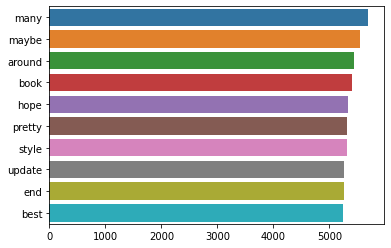

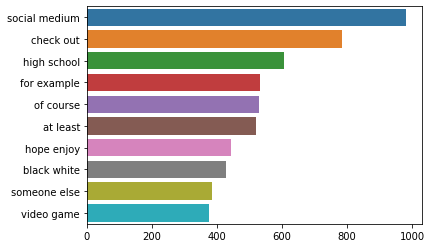

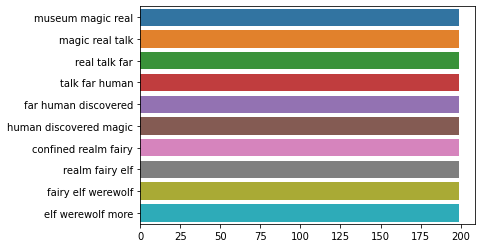

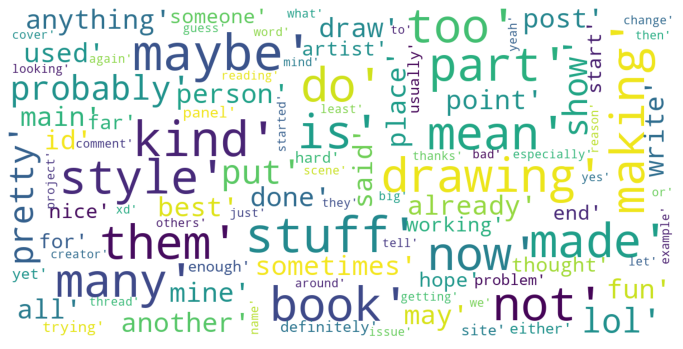

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords.words("english"),
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

new = train["Post"].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

top_n_unigrams = get_top_ngram((train["Post"]), 1)[:10]
x,y = map(list, zip(*top_n_unigrams))
sns.barplot(x=y, y=x)
plt.show()

top_n_bigrams = get_top_ngram((train["Post"]), 2)[:10]
x,y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)
plt.show()

top_tri_grams = get_top_ngram((train["Post"]), 3)[:10]
x, y = map(list, zip(*top_tri_grams))
sns.barplot(x=y, y=x)
plt.show()

""" Word Cloud """
show_wordcloud(corpus)

In [ ]:
train.to_csv("CleanedTapasData.csv", encoding='utf-8', index=False)